**IMPORTING NECESSARY MODULES FOR MODEL TRAINING/TESTING AND VISUALISATION**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import precision_score, recall_score, f1_score
from xgboost import XGBClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.layers import Conv1D, GlobalMaxPooling1D
import matplotlib.pyplot as plt

In [3]:
data_path = r"E:\College\2nd year\Winter project\Thyroid-Performance-Analysis\Data"

In [4]:
# data_path = r"C:\Users\dwija\OneDrive\Thyroid-Performance-Analysis\Data"

In [5]:
ann_test = pd.read_csv(data_path+r'\anntest.CSV')
ann_train = pd.read_csv(data_path+r'\anntrain.CSV')
hyper_test = pd.read_csv(data_path+r'\hyperTest.CSV')
hyper_train = pd.read_csv(data_path+r'\hyperTrain.CSV')
hypo_test = pd.read_csv(data_path+r'\hypoTest.CSV')
hypo_train = pd.read_csv(data_path+r'\hypoTrain.CSV')
all_hypo_train = pd.read_csv(data_path+r'\hypothyroid.csv')
euthyroid = pd.read_csv(data_path+r'\sick-euthyroid.CSV')
thyroid0387 = pd.read_csv(data_path+r'\thyroid0387EDIT.CSV')

In [6]:
data = {
    'ann test': ann_test,
    'ann train': ann_train,
    'hyper test': hyper_test,
    'hyper train': hyper_train,
    'hypo test': hypo_test,
    'hypo train': hypo_train,
}


In [7]:
hypo_hyper_data ={    'hyper test': hyper_test,
    'hyper train': hyper_train,
    'hypo test': hypo_test,
    'hypo train': hypo_train,
}

In [8]:
ann_train = ann_train.drop_duplicates()
ann_test = ann_test.drop_duplicates()

In [9]:
for df_name, df in hypo_hyper_data.items():
        df.drop("ID", axis=1, inplace=True)
        df.drop("referral_source", axis=1, inplace=True)

In [10]:
hyper_test['Target'] = hyper_test['Target'].replace(["hyperthyroid", "T3_toxic", "goitre", "secondary_toxic"], "hyperthyroid")
hyper_train['Target'] = hyper_train['Target'].replace(["hyperthyroid", "T3_toxic", "goitre", "secondary_toxic"], "hyperthyroid")
hypo_test['Target'] = hypo_test['Target'].replace(["hypothyroid", "primary_hypothyroid", "compensated_hypothyroid", "secondary_hypothyroid"],"hypothyroid")
hypo_train['Target'] = hypo_train['Target'].replace(["hypothyroid", "primary_hypothyroid", "compensated_hypothyroid", "secondary_hypothyroid"],"hypothyroid")

In [11]:
Dataset = pd.concat([hyper_test,hyper_train,hypo_test,hypo_train], ignore_index = True)

In [12]:
Dataset['sex'] = Dataset['sex'].replace({'M': 0, 'F': 1})

In [13]:
Dataset.replace('?', np.nan, inplace=True)

In [14]:
Dataset = Dataset.drop(['TBG', 'TBG_measured','sex'], axis=1)

In [15]:
Dataset.dropna(axis = 0, thresh = 22, inplace = True)
Dataset.isna().sum()

age                             2
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
sick                            0
pregnant                        0
thyroid_surgery                 0
I131_treatment                  0
query_hypothyroid               0
query_hyperthyroid              0
lithium                         0
goitre                          0
tumor                           0
hypopituitary                   0
psych                           0
TSH_measured                    0
TSH                           380
T3_measured                     0
T3                           1180
TT4_measured                    0
TT4                           104
T4U_measured                    0
T4U                           416
FTI_measured                    0
FTI                           412
Target                          0
dtype: int64

In [16]:
Dataset = Dataset.replace({"t":1,"f":0, "y":1, "n":0, "hypothyroid":1, "negative":0,"hyperthyroid":2, "F":1, "M":0})
display(Dataset.dtypes)

age                          object
on_thyroxine                  int64
query_on_thyroxine            int64
on_antithyroid_medication     int64
sick                          int64
pregnant                      int64
thyroid_surgery               int64
I131_treatment                int64
query_hypothyroid             int64
query_hyperthyroid            int64
lithium                       int64
goitre                        int64
tumor                         int64
hypopituitary                 int64
psych                         int64
TSH_measured                  int64
TSH                          object
T3_measured                   int64
T3                           object
TT4_measured                  int64
TT4                          object
T4U_measured                  int64
T4U                          object
FTI_measured                  int64
FTI                          object
Target                        int64
dtype: object

In [17]:
cols = Dataset.columns[Dataset.dtypes.eq('object')]
Dataset[cols] = Dataset[cols].apply(pd.to_numeric, errors='coerce')
display(Dataset.dtypes)

age                          float64
on_thyroxine                   int64
query_on_thyroxine             int64
on_antithyroid_medication      int64
sick                           int64
pregnant                       int64
thyroid_surgery                int64
I131_treatment                 int64
query_hypothyroid              int64
query_hyperthyroid             int64
lithium                        int64
goitre                         int64
tumor                          int64
hypopituitary                  int64
psych                          int64
TSH_measured                   int64
TSH                          float64
T3_measured                    int64
T3                           float64
TT4_measured                   int64
TT4                          float64
T4U_measured                   int64
T4U                          float64
FTI_measured                   int64
FTI                          float64
Target                         int64
dtype: object

In [18]:
Dataset = Dataset.interpolate(method = 'spline', order = 3)

In [19]:
Dataset.isna().sum()

age                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
sick                         0
pregnant                     0
thyroid_surgery              0
I131_treatment               0
query_hypothyroid            0
query_hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
Target                       0
dtype: int64

In [20]:
Dataset = Dataset.dropna()

In [21]:
X = Dataset.drop('Target', axis=1)  
y = Dataset['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
def results(y_test,y_pred):
    precision = precision_score(y_test, y_pred, average='weighted',zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    accuracy = accuracy_score(y_test, y_pred)

    print(f"Precision: {precision * 100:.2f}%")
    print(f"Recall: {recall * 100:.2f}%")
    print(f"F1-Score: {f1 * 100:.2f}%")
    print(f"Accuracy: {accuracy * 100:.2f}%")

**MODEL TRAINING RESULTS**

In [26]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
results(y_test,y_pred_rf)

Precision: 90.67%
Recall: 90.47%
F1-Score: 90.57%
Accuracy: 90.47%


In [27]:
svm_model = SVC(kernel='linear')  # You can choose different kernels like 'linear', 'rbf', etc.
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
results(y_test,y_pred_svm)

Precision: 90.10%
Recall: 94.92%
F1-Score: 92.45%
Accuracy: 94.92%


In [28]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
X_test_array = X_test.values  
y_pred_knn = knn_model.predict(X_test_array) 
results(y_test, y_pred_knn)


c:\Users\dwija\anaconda3\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Precision: 90.93%
Recall: 93.74%
F1-Score: 92.17%
Accuracy: 93.74%


In [29]:
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)
results(y_test, y_pred_gb)

Precision: 95.95%
Recall: 89.01%
F1-Score: 91.47%
Accuracy: 89.01%


In [33]:
xgb_model = XGBClassifier(n_estimators=100, random_state=42)  
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

results(y_test, y_pred_xgb)

Precision: 91.99%
Recall: 91.66%
F1-Score: 91.82%
Accuracy: 91.66%


In [34]:
nb_model = BernoulliNB()
nb_model.fit(X_train, y_train)
y_pred_gnb = nb_model.predict(X_test)
results(y_test, y_pred_gnb)

Precision: 93.90%
Recall: 94.58%
F1-Score: 92.41%
Accuracy: 94.58%


In [35]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
results(y_test, y_pred_dt)

Precision: 91.21%
Recall: 90.89%
F1-Score: 91.05%
Accuracy: 90.89%


In [36]:
models_dict = {
    'RandomForest': rf_model,
    'SVC': svm_model,
    'KNeighbors': knn_model,
    'GradientBoosting': gb_model,
    'XGBoost': xgb_model,
    'BernoulliNB': nb_model,
    'DecisionTree': dt_model,
}

**SAVING THE MODEL**

In [39]:
folder_path = r'C:\Users\dwija\OneDrive\Thyroid-Performance-Analysis\SAVED_MODEL'
file_name = 'models.pkl'
full_path = f'{folder_path}/{file_name}'

# Save the dictionary of models using pickle
with open(full_path, 'wb') as file:
    pickle.dump(models_dict, file)

print(f'Models saved to {full_path}')

Models saved to C:\Users\dwija\OneDrive\Thyroid-Performance-Analysis\SAVED_MODEL/models.pkl


**SCALING AND RESHAPING X_TRAIN AND X_TEST**

In [24]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [25]:
X_train_reshaped = np.reshape(X_train_scaled, (X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_reshaped = np.reshape(X_test_scaled, (X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

**LSTM MODEL**

In [216]:
LSTM_mod = Sequential()
LSTM_mod.add(LSTM(units=50, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
LSTM_mod.add(Dense(units=1, activation='sigmoid'))

In [217]:
LSTM_mod.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

In [340]:
LSTM_mod.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_20 (LSTM)              (None, 50)                15200     
                                                                 
 dense_12 (Dense)            (None, 1)                 51        
                                                                 
Total params: 15251 (59.57 KB)
Trainable params: 15251 (59.57 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [218]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint(r'E:\College\2nd year\Winter project\Thyroid-Performance-Analysis\SAVED_MODEL\LSTM_model.h5', save_best_only=True)

In [279]:
lstm = LSTM_mod.fit(X_train_reshaped, y_train, epochs=30, batch_size=32,
          validation_data=(X_test_reshaped, y_test),
          callbacks=[early_stopping, model_checkpoint]
          )

Epoch 1/30
180/180 [==============================] - 1s 5ms/step - loss: 0.1830 - accuracy: 0.9360 - val_loss: 0.1668 - val_accuracy: 0.9438
Epoch 2/30
180/180 [==============================] - 0s 2ms/step - loss: 0.1818 - accuracy: 0.9358 - val_loss: 0.1661 - val_accuracy: 0.9438
Epoch 3/30
180/180 [==============================] - 0s 2ms/step - loss: 0.1807 - accuracy: 0.9353 - val_loss: 0.1656 - val_accuracy: 0.9438
Epoch 4/30
180/180 [==============================] - 1s 3ms/step - loss: 0.1795 - accuracy: 0.9348 - val_loss: 0.1650 - val_accuracy: 0.9438
Epoch 5/30
180/180 [==============================] - 0s 3ms/step - loss: 0.1784 - accuracy: 0.9341 - val_loss: 0.1644 - val_accuracy: 0.9438
Epoch 6/30
180/180 [==============================] - 0s 3ms/step - loss: 0.1773 - accuracy: 0.9335 - val_loss: 0.1641 - val_accuracy: 0.9438
Epoch 7/30
180/180 [==============================] - 0s 3ms/step - loss: 0.1763 - accuracy: 0.9335 - val_loss: 0.1637 - val_accuracy: 0.9438
Epoch 

**PLOTTING THE TRAINING AND VALIDATION LOSS**

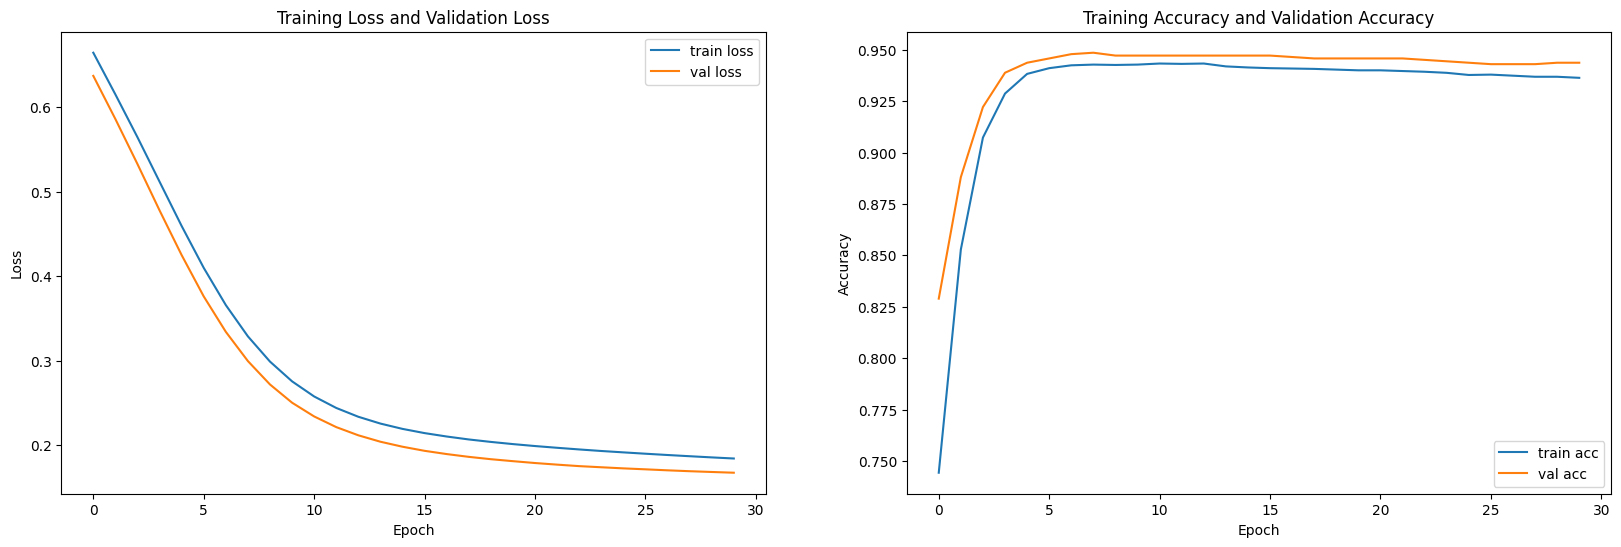

In [220]:
fig, axs = plt.subplots(1, 2, figsize=(20, 6))

axs[0].plot(lstm.history['loss'], label='train loss')
axs[0].plot(lstm.history['val_loss'], label='val loss')
axs[0].set_title("Training Loss and Validation Loss")
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Loss')
axs[0].legend()

axs[1].plot(lstm.history['accuracy'], label='train acc')
axs[1].plot(lstm.history['val_accuracy'], label='val acc')
axs[1].set_title('Training Accuracy and Validation Accuracy')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Accuracy')
axs[1].legend()

plt.show()

In [283]:
y_pred = lstm.predict(X_test_reshaped)
y_pred_binary = (y_pred > 0.5).astype(int)
results(y_test,y_pred_binary)

45/45 [==============================] - 0s 2ms/step
Precision: 91.61%
Recall: 94.37%
F1-Score: 92.90%
Accuracy: 94.37%


**ANN MODEL**

In [63]:
ann_model = Sequential()
ann_model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train_scaled.shape[1], 1)))
ann_model.add(GlobalMaxPooling1D())
ann_model.add(Dense(units=64, activation='relu'))
ann_model.add(Dense(units=1, activation='sigmoid'))


In [64]:
ann_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [65]:
ann_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_3 (Conv1D)           (None, 23, 64)            256       
                                                                 
 global_max_pooling1d_3 (Gl  (None, 64)                0         
 obalMaxPooling1D)                                               
                                                                 
 dense_6 (Dense)             (None, 64)                4160      
                                                                 
 dense_7 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4481 (17.50 KB)
Trainable params: 4481 (17.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [66]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint(r'E:\College\2nd year\Winter project\Thyroid-Performance-Analysis\SAVED_MODEL\ANN_model.h5', save_best_only=True)

In [67]:
ann = ann_model.fit(X_train_scaled, y_train, epochs=50, batch_size=32,
          validation_data=(X_test_scaled, y_test),
          callbacks=[early_stopping, model_checkpoint])

Epoch 1/50
180/180 [==============================] - 1s 5ms/step - loss: 0.3228 - accuracy: 0.9443 - val_loss: 0.2531 - val_accuracy: 0.9492
Epoch 2/50
180/180 [==============================] - 1s 3ms/step - loss: 0.2520 - accuracy: 0.9443 - val_loss: 0.2257 - val_accuracy: 0.9492
Epoch 3/50
180/180 [==============================] - 0s 3ms/step - loss: 0.2448 - accuracy: 0.9442 - val_loss: 0.2218 - val_accuracy: 0.9492
Epoch 4/50
180/180 [==============================] - 1s 4ms/step - loss: 0.2413 - accuracy: 0.9440 - val_loss: 0.2158 - val_accuracy: 0.9492
Epoch 5/50
180/180 [==============================] - 0s 3ms/step - loss: 0.2380 - accuracy: 0.9443 - val_loss: 0.2168 - val_accuracy: 0.9492
Epoch 6/50
180/180 [==============================] - 1s 3ms/step - loss: 0.2361 - accuracy: 0.9443 - val_loss: 0.2149 - val_accuracy: 0.9492
Epoch 7/50
180/180 [==============================] - 0s 3ms/step - loss: 0.2350 - accuracy: 0.9443 - val_loss: 0.2186 - val_accuracy: 0.9492
Epoch 

**PLOTTING THE TRAINING AND VALIDATION LOSS**

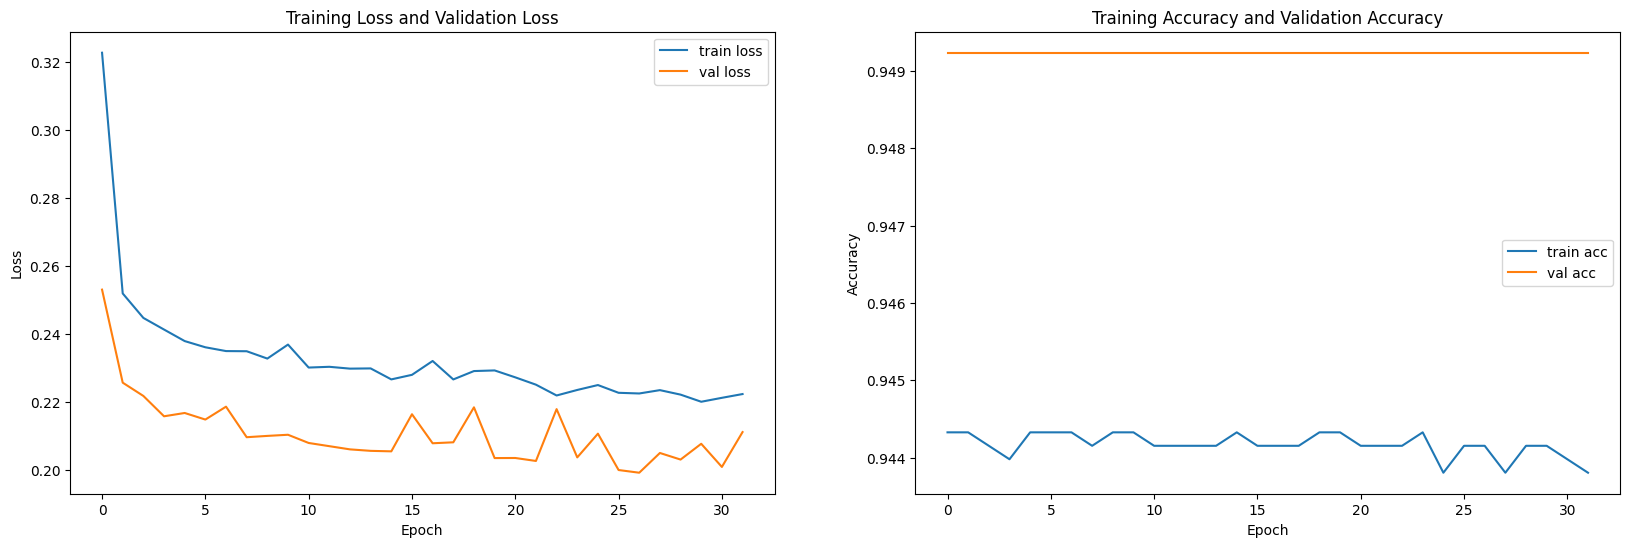

In [68]:
fig, axs = plt.subplots(1, 2, figsize=(20, 6))

axs[0].plot(ann.history['loss'], label='train loss')
axs[0].plot(ann.history['val_loss'], label='val loss')
axs[0].set_title("Training Loss and Validation Loss")
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Loss')
axs[0].legend()

axs[1].plot(ann.history['accuracy'], label='train acc')
axs[1].plot(ann.history['val_accuracy'], label='val acc')
axs[1].set_title('Training Accuracy and Validation Accuracy')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Accuracy')
axs[1].legend()

plt.show()

In [69]:
y_pred = ann_model.predict(X_test_scaled)
y_pred_classes = (y_pred > 0.5).astype(int)
y_test = np.array(y_test)
results(y_test,y_pred_classes)

 1/45 [..............................] - ETA: 2s

45/45 [==============================] - 0s 1ms/step
Precision: 90.17%
Recall: 94.92%
F1-Score: 92.48%
Accuracy: 94.92%
